# Implementing PCA in Python

In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load the Iris dataset, which is a built-in dataset containing 150 samples and 4 features
iris = load_iris()

# Convert the dataset to a Pandas DataFrame for easier manipulation and analysis
# iris.data contains the feature values, and iris.feature_names contains the feature names
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Calculate the correlation matrix between features
# Correlation coefficients range from -1 to 1 and measure the linear relationship between variables
correlation_matrix = df.corr()

correlation_matrix.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [ ]:
# Perform eigenvalue decomposition to obtain eigenvalues and eigenvectors from the correlation matrix
# np.linalg.eig() returns two arrays:
# - eigenvalues: Represents the variance explained by each principal component
# - eigenvectors: Represents the direction of each principal component
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

print(f"Eigenvalues: {eigenvalues}")
print(f"Eigenvectors: {eigenvectors}")

# Calculate the variance ratio of each principal component
# Divide each eigenvalue by the sum of all eigenvalues to get the proportion of variance explained
# This ratio indicates how much variance each component captures from the original data
variance_ratio = eigenvalues / eigenvalues.sum()

# Print the variance ratio of each principal component
# Example output: [0.92, 0.05, 0.02, 0.01] indicates the first component explains 92% of variance
print("Variance ratio of each principal component:", variance_ratio)

Eigenvalues: [2.91849782 0.91403047 0.14675688 0.02071484]
Eigenvectors: [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]
Variance ratio of each principal component: [0.72962445 0.22850762 0.03668922 0.00517871]


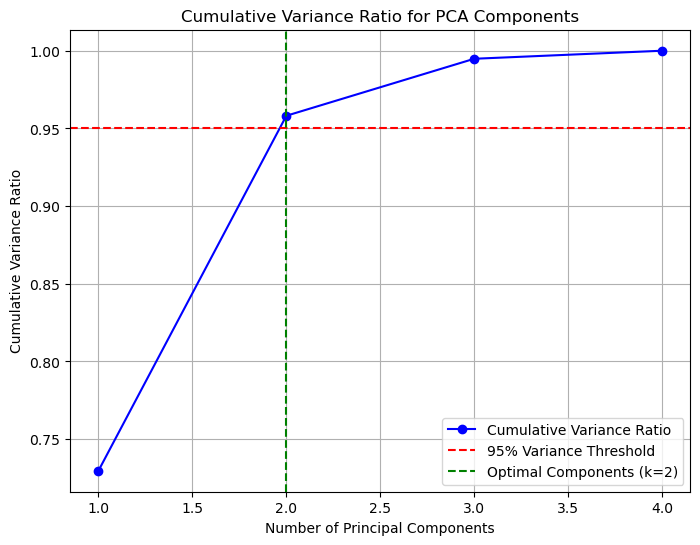

In [16]:
# Calculate the cumulative variance ratio
# np.cumsum() computes the cumulative sum of variance ratios to see how much variance is explained
# as we include more principal components
cumulative_variance_ratio = np.cumsum(variance_ratio)

# Plot the cumulative variance ratio to visualize how many components are needed
plt.figure(figsize=(8, 6))  # Set the figure size
plt.plot(np.arange(1, len(variance_ratio) + 1), cumulative_variance_ratio, 
         marker='o', color='blue', label="Cumulative Variance Ratio")

plt.axhline(y=0.95, color='red', linestyle='--', label="95% Variance Threshold")   # Add a horizontal dashed line to indicate the 95% variance threshold
plt.axvline(x=2, color='green', linestyle='--', label="Optimal Components (k=2)")   # Add a vertical dashed line to indicate the optimal number of components (k=2)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.title('Cumulative Variance Ratio for PCA Components')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Implementing PCA using Scikit-Learn

In [19]:
# Import necessary libraries
import numpy as np 
import pandas as pd  
from sklearn.decomposition import PCA  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.datasets import load_iris  
from sklearn.preprocessing import StandardScaler 

# 1. Load the Iris dataset and create a DataFrame
iris = load_iris()  # Load the Iris dataset
df = pd.DataFrame(iris.data, columns=iris.feature_names)  # Create a DataFrame with feature names
df['species'] = iris.target  # Add target labels as a new column

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
# 2. Standardize the data (PCA requires standardized data for optimal performance)
scaler = StandardScaler()  # Initialize the standard scaler
# Standardize the features by removing the mean and scaling to unit variance
data_matrix_standardized = scaler.fit_transform(df.drop('species', axis=1))  

# 3. Apply PCA to reduce dimensionality
pca = PCA(n_components=4)  # Initialize PCA to retain all four principal components
# Perform PCA transformation and convert the result to a DataFrame
data_pcomp = pca.fit_transform(data_matrix_standardized)
data_pcomp = pd.DataFrame(data_pcomp, columns=['PC1', 'PC2', 'PC3', 'PC4'])  
print("Data after dimensionality reduction:")

# 4. Map the numeric labels to species names and add to the DataFrame
data_pcomp['species'] = df['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}) 
print(data_pcomp.head())  

Data after dimensionality reduction:
        PC1       PC2       PC3       PC4 species
0 -2.264703  0.480027  0.127706 -0.024168  Setosa
1 -2.080961 -0.674134  0.234609 -0.103007  Setosa
2 -2.364229 -0.341908 -0.044201 -0.028377  Setosa
3 -2.299384 -0.597395 -0.091290  0.065956  Setosa
4 -2.389842  0.646835 -0.015738  0.035923  Setosa


<Figure size 800x600 with 0 Axes>

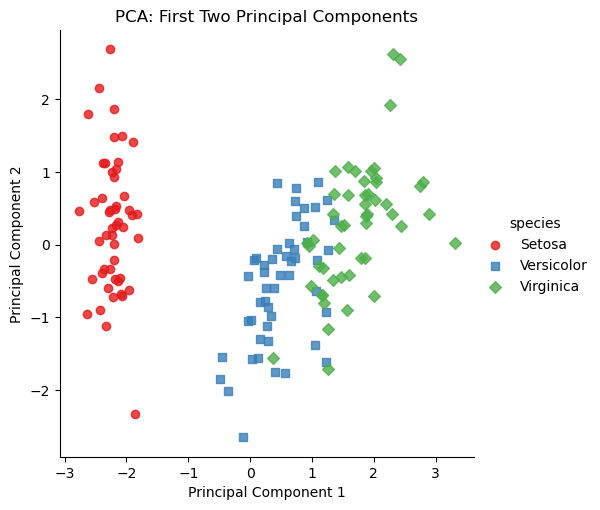

In [24]:
# 5. Visualize the first two principal components using a scatter plot
plt.figure(figsize=(8, 6)) 
sns.lmplot(
    x='PC1', y='PC2', data=data_pcomp, hue='species', 
    fit_reg=False, markers=["o", "s", "D"], palette="Set1"
)
plt.title('PCA: First Two Principal Components')  
plt.xlabel('Principal Component 1')  
plt.ylabel('Principal Component 2') 
plt.show()  

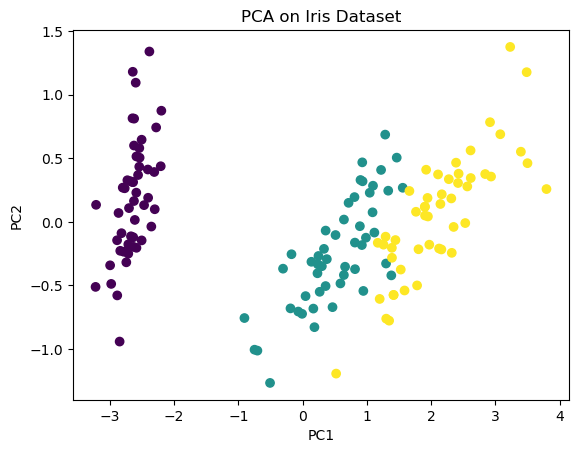

In [4]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd

# 載入資料
iris = load_iris()
X = iris.data
y = iris.target

# 建立 PCA 模型並降為 2 維
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 繪圖
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA on Iris Dataset")
plt.show()

# image data

Number of features(pixels) per image: 4096
Square image side length: 64


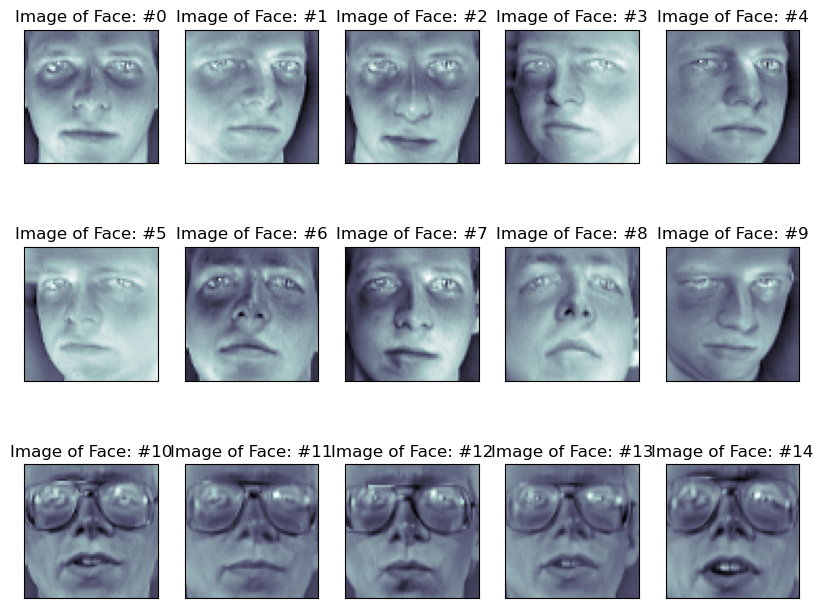

In [ ]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# Download the data from sklearn's datasets
faces = datasets.fetch_olivetti_faces()['data']

# 1. Standardize the images using the mean and standard deviation
faces_mean = faces.mean(axis=0)
faces_std = faces.std(axis=0)
faces_standardized = (faces - faces_mean) / faces_std

# 2. Find the number of features per image
n_images, n_features = faces_standardized.shape
side_length = int(np.sqrt(n_features))
print(f'Number of features(pixels) per image: {n_features}')
print(f'Square image side length: {side_length}')

# 3. Plot the images
# Create an empty 10x8 plot
fig = plt.figure(figsize=(10, 8))

# Observe the first 15 images.
for i in range(15):
    # Create subplot, remove x and y ticks, and add title
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f'Image of Face: #{i}')

    # Get an image from a row based on the current value of i
    face_image = faces_standardized[i]

    # Reshape this image into side_length x side_length 
    face_image_reshaped = face_image.reshape(side_length, side_length)

    # Show the image
    ax.imshow(face_image_reshaped, cmap=plt.cm.bone)
plt.show()

In [4]:
import datetime

current_date = datetime.datetime.now().strftime("%Y年%m月%d日")
print(f"更新日期: {current_date}")

更新日期: 2024年12月01日
